In [1]:
import numpy as np 
import pandas as pd 

In [37]:
demographic = pd.read_csv('../data/national-health-and-nutrition-examination-survey/demographic.csv', sep=',')
diet = pd.read_csv('../data/national-health-and-nutrition-examination-survey/diet.csv', sep=',')
examination = pd.read_csv('../data/national-health-and-nutrition-examination-survey/examination.csv', sep=',')
labs = pd.read_csv('../data/national-health-and-nutrition-examination-survey/labs.csv', sep=',')
medications = pd.read_csv('../data/national-health-and-nutrition-examination-survey/medications.csv', sep=',', 
                          encoding='iso-8859-1')
questionnaire = pd.read_csv('../data/national-health-and-nutrition-examination-survey/questionnaire.csv', sep=',')

In [6]:
#Número de filas y columnas de cada archivo.

print('El archivo demographic tiene {} filas y {} columnas.'.format(demographic.shape[0], demographic.shape[1]))
print('El archivo diet tiene {} filas y {} columnas.'.format(diet.shape[0], diet.shape[1]))
print('El archivo examination tiene {} filas y {} columnas.'.format(examination.shape[0], examination.shape[1]))
print('El archivo demographic tiene {} filas y {} columnas.'.format(labs.shape[0], labs.shape[1]))
print('El archivo medications tiene {} filas y {} columnas.'.format(medications.shape[0], medications.shape[1]))
print('El archivo questionnaire tiene {} filas y {} columnas.'.format(questionnaire.shape[0], questionnaire.shape[1]))

El archivo demographic tiene 10175 filas y 47 columnas.
El archivo diet tiene 9813 filas y 168 columnas.
El archivo examination tiene 9813 filas y 224 columnas.
El archivo demographic tiene 9813 filas y 424 columnas.
El archivo medications tiene 20194 filas y 13 columnas.
El archivo questionnaire tiene 10175 filas y 953 columnas.


In [40]:
#Limpieza de medications
medications = medications[medications.RXDRSD1.notnull()]

In [41]:
df = pd.merge(demographic, examination, how='outer', on='SEQN')
# df
df = pd.merge(df, diet, how='outer', on='SEQN')
# df
df = pd.merge(df, labs, how='outer', on='SEQN')
# df
df = pd.merge(df, questionnaire, how='outer', on='SEQN')
# df
df = pd.merge(df, medications, how='outer', on='SEQN')
# df

In [42]:
# ver primeros 5 registros
df.head(5)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
2,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
3,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0
4,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,d00746,1.0,61.0,E78.0,NaN,NaN,Pure hypercholesterolemia,NaN,NaN,4.0


In [44]:
df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520,RXDUSE,RXQSEEN,RXDDAYS,RXDCOUNT
count,19792.000000,19792.0,19792.000000,19792.000000,19792.000000,705.000000,19792.000000,19792.000000,19192.000000,4766.000000,...,10197.000000,15158.000000,14954.000000,1708.000000,1708.000000,1708.000000,13633.0,13630.000000,13629.000000,13633.000000
mean,78543.930426,8.0,1.969685,1.534004,44.909105,10.436879,3.111156,3.268897,1.514120,109.793538,...,328.168187,327.863241,728.687575,2.560890,2.307377,1.752342,1.0,1.162656,3436.821484,5.880217
std,2930.635851,0.0,0.171458,0.498855,25.642940,6.837962,1.148106,1.456716,0.499814,69.044148,...,1581.133264,1075.328505,8227.019133,0.798603,1.216376,0.710718,0.0,0.494774,12140.893077,3.803004
min,73557.000000,8.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
25%,75990.750000,8.0,2.000000,1.000000,19.000000,5.000000,3.000000,3.000000,1.000000,49.000000,...,63.000000,165.000000,32.000000,2.000000,1.000000,1.000000,1.0,1.000000,365.000000,3.000000
50%,78507.500000,8.0,2.000000,2.000000,51.000000,9.000000,3.000000,3.000000,2.000000,107.000000,...,66.000000,195.000000,48.000000,3.000000,2.000000,2.000000,1.0,1.000000,1095.000000,5.000000
75%,81065.250000,8.0,2.000000,2.000000,66.000000,16.000000,4.000000,4.000000,2.000000,169.000000,...,70.000000,240.000000,60.000000,3.000000,3.000000,2.000000,1.0,1.000000,2920.000000,8.000000
max,83731.000000,8.0,2.000000,2.000000,80.000000,24.000000,5.000000,7.000000,2.000000,239.000000,...,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000,1.0,3.000000,99999.000000,23.000000


In [45]:
#Contar los nan
df.isnull().sum()

SEQN            0
SDDSRVYR        0
RIDSTATR        0
RIAGENDR        0
RIDAGEYR        0
RIDAGEMN    19087
RIDRETH1        0
RIDRETH3        0
RIDEXMON      600
RIDEXAGM    15026
DMQMILIZ     4414
DMQADFC     17767
DMDBORN4        0
DMDCITZN        6
DMDYRSUS    16284
DMDEDUC3    16528
DMDEDUC2     4967
DMDMARTL     4967
RIDEXPRG    17782
SIALANG         0
SIAPROXY        1
SIAINTRP        0
FIALANG       215
FIAPROXY      215
FIAINTRP      215
MIALANG      3744
MIAPROXY     3742
MIAINTRP     3739
AIALANGA     7902
DMDHHSIZ        0
            ...  
WHD080M     17305
WHD080N     19342
WHD080O     17891
WHD080P     19750
WHD080Q     16964
WHD080R     17195
WHD080S     17423
WHD080T     17233
WHD080U     19755
WHD080L     19697
WHD110       7104
WHD120       5943
WHD130       9595
WHD140       4634
WHQ150       4838
WHQ030M     18084
WHQ500      18084
WHQ520      18084
RXDUSE       6159
RXDDRUG      6159
RXDDRGID     6166
RXQSEEN      6162
RXDDAYS      6163
RXDRSC1      6159
RXDRSC2   

In [ ]:
#IMPUTACION NAN

In [46]:
#Se eliminan las filas y columnas que tengan todos los elementos nulos
df=df.dropna(axis=0,how='all')
df=df.dropna(axis=1,how='all')

In [47]:
#Imputamos RIDAGEMN. Esta variable es la edad en meses y en pacientes mayores de 2 años no aparece este dato. Es una variable
#interesante de mantener para poder tener una edad más exacta.
#Así que en los registros que no existan, multiplicamos la edad en años, RIDAGEYR, por 12 para obtener los meses.
# df.RIDAGEYR*12

df.RIDAGEMN=df.RIDAGEMN.replace(np.nan, df.RIDAGEYR*12)

In [48]:
#Imputamos RIDEXAGM. Esta variable es la edad en meses en el momento del examen. Si el valor es nulo, 
# lo imputamos con el valor de RIDAGEMN

df.RIDEXAGM=df.RIDEXAGM.replace(np.nan, df.RIDAGEMN)

In [49]:
#Imputación para el resto
for column in df.columns:
    if df[column].isnull().sum() != 0:
        if df[column].dtype==object:
            df[column].fillna(value=df[column].value_counts().index[0],inplace =True)
        else:
            df[column].fillna(df[column].median(),inplace =True)

In [53]:
# 
# df.to_csv('data')

In [50]:
# Tabla de frecuencia de las enfermedades.
pd.value_counts(df.RXDRSC1)

I10        8580
E78.0      1172
E11         924
J45         544
F32.9       488
K21         445
F41.9       389
E03.9       340
M54.9       275
G47.0       217
J30.9       204
F90         192
K30         175
T78.40      159
M79.2       145
R60.9       142
I21.P       137
I50.9       122
D75.9P      120
G47.9       119
Z79.3       116
N40         112
E87.6       110
H40         102
G43         101
I49.9       101
J44.9       100
G40          97
M79.1        96
F31.9        81
           ... 
I72.9P        1
M31.6         1
K12.2         1
Z34.9         1
M88           1
M79.646       1
Z96.64        1
I73.0         1
A08.4         1
G83.9         1
I70.21        1
K12.0         1
J01           1
K21.P         1
M27.2         1
H33           1
K64           1
H11.3         1
Z90.710       1
H92.0         1
E53.9         1
F95.2         1
N81.4         1
E63.9         1
R51.P         1
M51.9         1
R20.2         1
Z87.11        1
I77.9         1
B86           1
Name: RXDRSC1, Length: 4

In [51]:
# Tabla de frecuencia relativa de enfermedades
100 * df.RXDRSC1.value_counts() / len(df.RXDRSC1)

I10        43.350849
E78.0       5.921584
E11         4.668553
J45         2.748585
F32.9       2.465643
K21         2.248383
F41.9       1.965441
E03.9       1.717866
M54.9       1.389450
G47.0       1.096403
J30.9       1.030719
F90         0.970089
K30         0.884196
T78.40      0.803355
M79.2       0.732619
R60.9       0.717462
I21.P       0.692199
I50.9       0.616411
D75.9P      0.606306
G47.9       0.601253
Z79.3       0.586095
N40         0.565885
E87.6       0.555780
H40         0.515360
G43         0.510307
I49.9       0.510307
J44.9       0.505255
G40         0.490097
M79.1       0.485044
F31.9       0.409256
             ...    
I72.9P      0.005053
M31.6       0.005053
K12.2       0.005053
Z34.9       0.005053
M88         0.005053
M79.646     0.005053
Z96.64      0.005053
I73.0       0.005053
A08.4       0.005053
G83.9       0.005053
I70.21      0.005053
K12.0       0.005053
J01         0.005053
K21.P       0.005053
M27.2       0.005053
H33         0.005053
K64         0

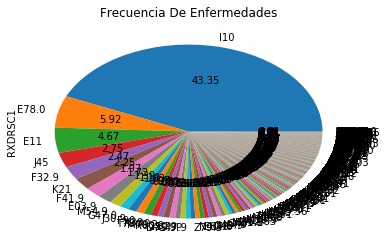

In [52]:
# Gráfico de tarta de pasajeros del Titanic
plot = df.RXDRSC1.value_counts().plot(kind='pie', autopct='%.2f',
                                            title='Frecuencia De Enfermedades')